# Import Library dan File

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",9999)
pd.set_option("display.max.rows",9999)

from scipy import stats
from scipy.stats import skew

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
traindata = pd.read_csv('/content/drive/MyDrive/Competition & Project/Prod Padi Prediction/Data_Tanaman_Padi_Sumatera_version_1.csv')
traindata.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


# Basic Data Understanding

### Cek basic info data

In [ ]:
traindata.sample(5)

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
75,Sumatera Barat,2012,2368390.0,476422.00,4339.0,87.00,25.20
216,Lampung,2013,3207002.0,638090.00,2456.7,81.00,26.70
121,Jambi,2002,561007.0,165729.00,2044.5,70.77,28.82
188,Bengkulu,2013,622832.0,147680.00,3980.9,83.93,26.70
27,Aceh,2020,1861567.1,317869.41,1619.2,80.82,25.41


In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


**Catatan**
* Tahun dapat didrop karena menurut saya tidak memengaruhi hasil produksi

In [ ]:
traindata.drop(columns = ['Tahun'], inplace = True)

In [ ]:
traindata.describe(include = 'O')

,Provinsi
count,224
unique,8
top,Aceh
freq,28


In [ ]:
traindata.describe(include = [int, float])

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


**Catatan**
* tidak ada missing value (enak lebih cepet:v)
* mean dan median dari setiap feature relatif sama menandakan data sudah berdistribusi normal

# EDA

### cek distribusi pada data target

In [ ]:
traindata['Produksi'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Produksi,224.0,1.679701e+06,1.161387e+06,42938.0,548857.0,1667773.0,2436850.75,4881089.0


Text(0.5, 1.0, 'Cek Outlier')

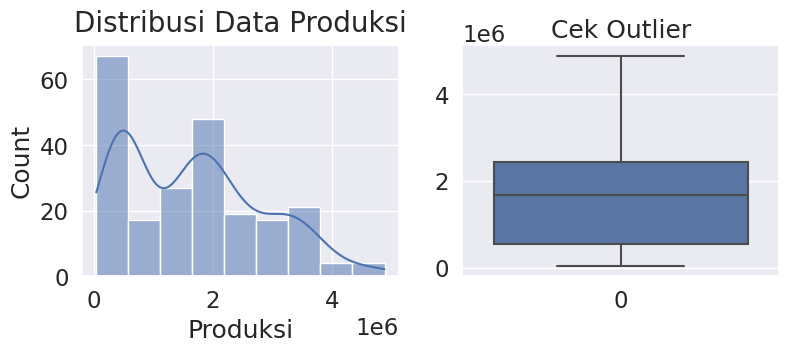

In [ ]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.histplot(traindata['Produksi'], palette = 'inferno', kde = True)
plt.title('Distribusi Data Produksi', size = 20, pad = 10)
plt.subplot(1,2,2)
sns.boxplot(traindata['Produksi'])
plt.title('Cek Outlier')

**Catatan**
* data target berdistribusi normal
* saya akan melakukan ceking transformasi jika da transformasi yang bisa lebih menormalkan data target

Text(0.5, 1.0, 'Transformasi Log Normal')

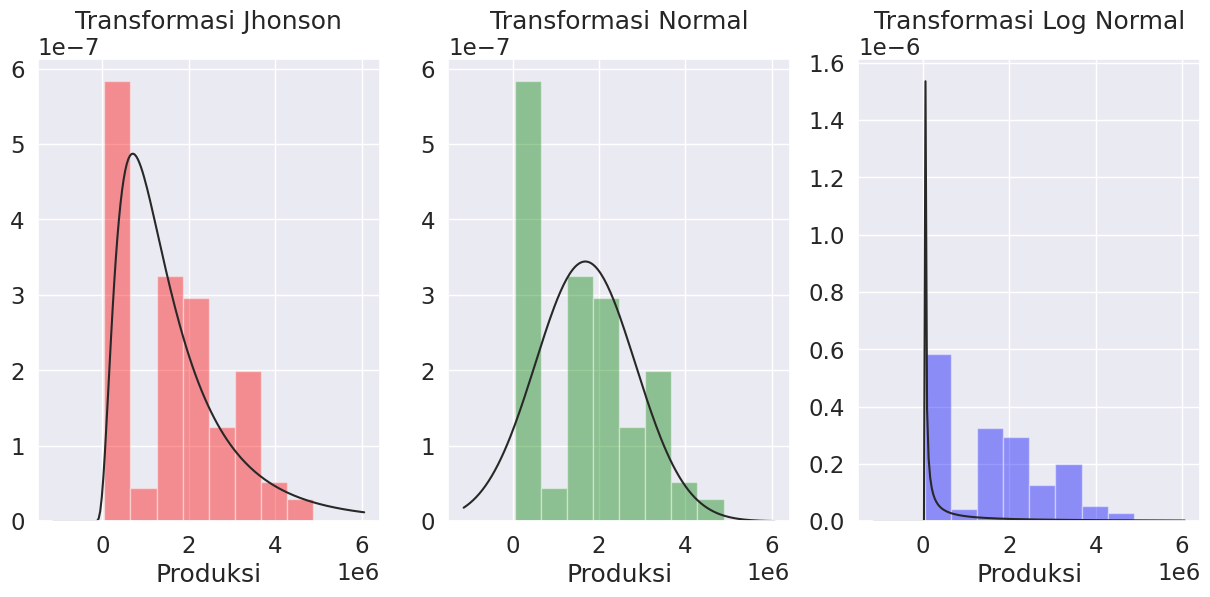

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.distplot(traindata['Produksi'],kde=False, fit=stats.johnsonsu,color="red")
plt.title("Transformasi Jhonson")
plt.subplot(1,3,2)
sns.distplot(traindata['Produksi'], kde = False, fit = stats.norm, color = 'green')
plt.title("Transformasi Normal")
plt.subplot(1,3,3)
sns.distplot(traindata['Produksi'], kde = False, fit = stats.lognorm, color = 'blue')
plt.title("Transformasi Log Normal")

**Catatan**
* Transformasi dengan menggunakan metode normal menunjukkan distribusi yang cukup normal

### cek distribusi pada data independen

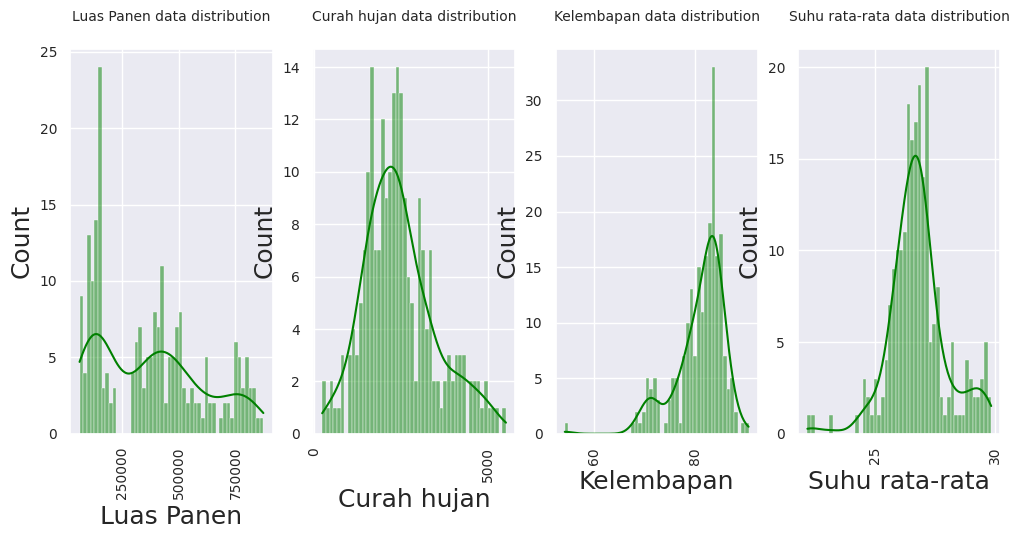

In [ ]:
num_col = ['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']
plt.figure(figsize=(12,5))
for i,col in enumerate(num_col):
  plt.subplot(1,4,i+1)
  sns.histplot(traindata[col], kde = True, color = 'green', bins = 50)
  plt.title(f"{col} data distribution", size = 10, pad = 20)
  plt.xticks(rotation = 90, size=10)
  plt.yticks(size=10)

**Catetan**
* Fitur semua fitur sudah cukup berdistribusi normal
* Fitur **Kelembapan** skewness negatif, bisa dilakukan transformasi

In [ ]:
traindata[num_col].skew().sort_values().to_frame().rename(columns = {0:'Skew'})

,Skew
Kelembapan,-1.487425
Suhu rata-rata,0.061508
Luas Panen,0.428898
Curah hujan,0.631927


Text(0.5, 1.0, 'Transformasi Log Normal')

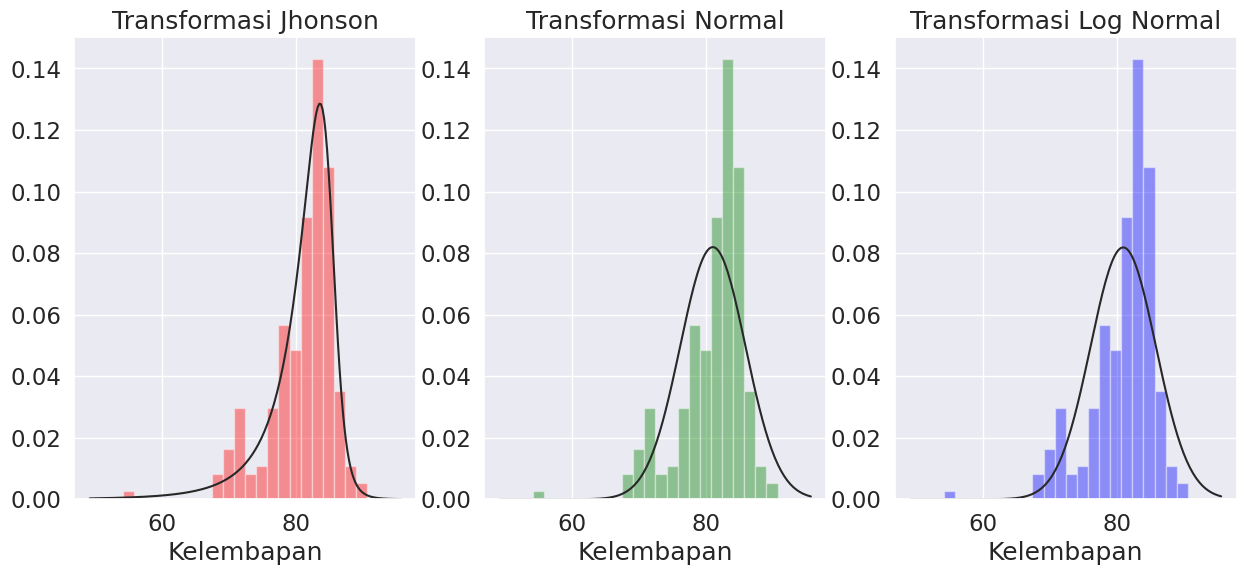

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.distplot(traindata['Kelembapan'],kde=False, fit=stats.johnsonsu,color="red")
plt.title("Transformasi Jhonson")
plt.subplot(1,3,2)
sns.distplot(traindata['Kelembapan'], kde = False, fit = stats.norm, color = 'green')
plt.title("Transformasi Normal")
plt.subplot(1,3,3)
sns.distplot(traindata['Kelembapan'], kde = False, fit = stats.lognorm, color = 'blue')
plt.title("Transformasi Log Normal")

<Axes: >

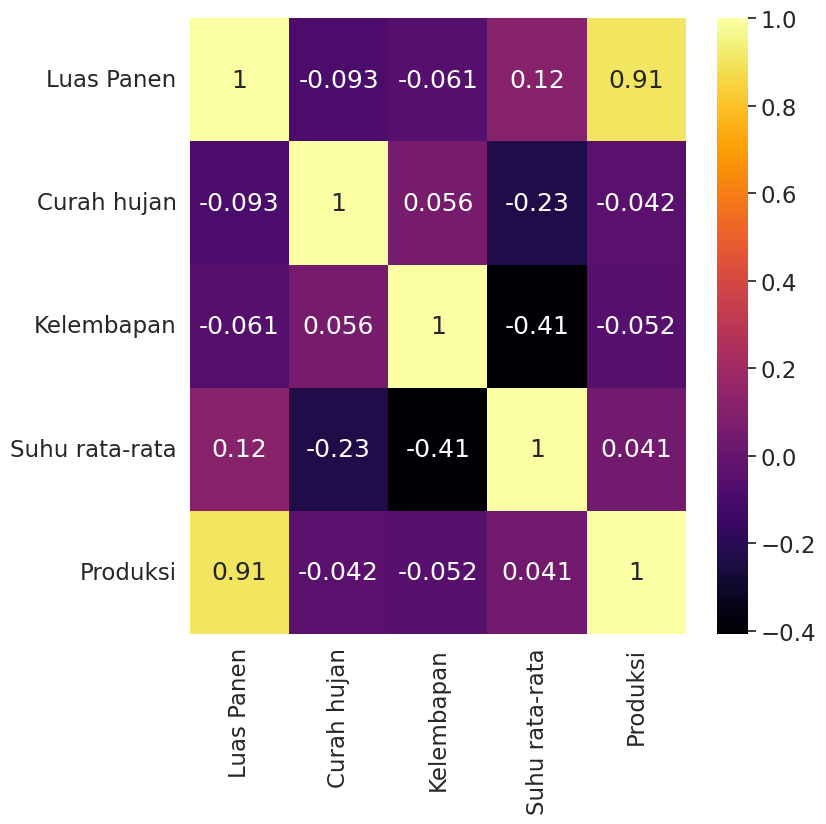

In [ ]:
num_col = ['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']
num_col.append('Produksi')
plt.figure(figsize=(8,8))
sns.heatmap(traindata[num_col].corr(), annot = True, cmap = 'inferno')

**Catatan**
* Fitur Luas Panen memiliki korelasi yang cukup kuat dengan data target
* Fitur lainnya memiliki korelasi yang rendah (entah didrop atau ditransformasi aja)

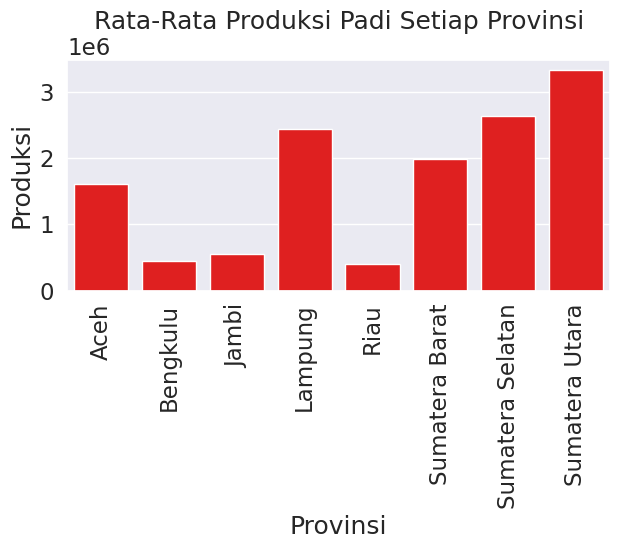

In [ ]:
rata_per_provinsi = traindata.groupby('Provinsi')['Produksi'].mean().to_frame()
plt.figure(figsize=(7,3))
sns.barplot(x = rata_per_provinsi.index, y = rata_per_provinsi['Produksi'], data = rata_per_provinsi, color = 'Red')
plt.title('Rata-Rata Produksi Padi Setiap Provinsi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Data Processing and Modelling

### Normal Transformasi pada data target

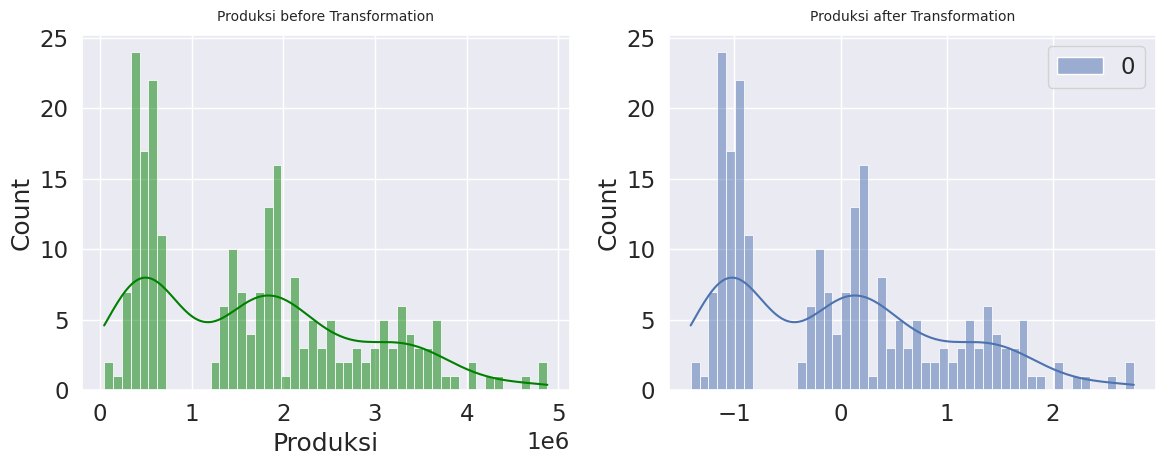

In [ ]:
prod_after = StandardScaler().fit_transform(traindata[['Produksi']])

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(traindata['Produksi'], color = 'green', kde = True, bins=50)
plt.title('Produksi before Transformation', size = 10, pad = 10)
plt.subplot(1,2,2)
sns.histplot(prod_after, color = 'green', kde = True, bins=50)
plt.title('Produksi after Transformation', size = 10, pad = 10)
plt.tight_layout()
plt.show()

**Catatan**
* tidak ada perubahan pada data, malah jika dilakukan transformasi korelasi antara data target dan data independen lainnya berkurang
* saya memutuskan data target tetap menggunakan data tanpa transformasi

### log transformasi pada data kelembapan

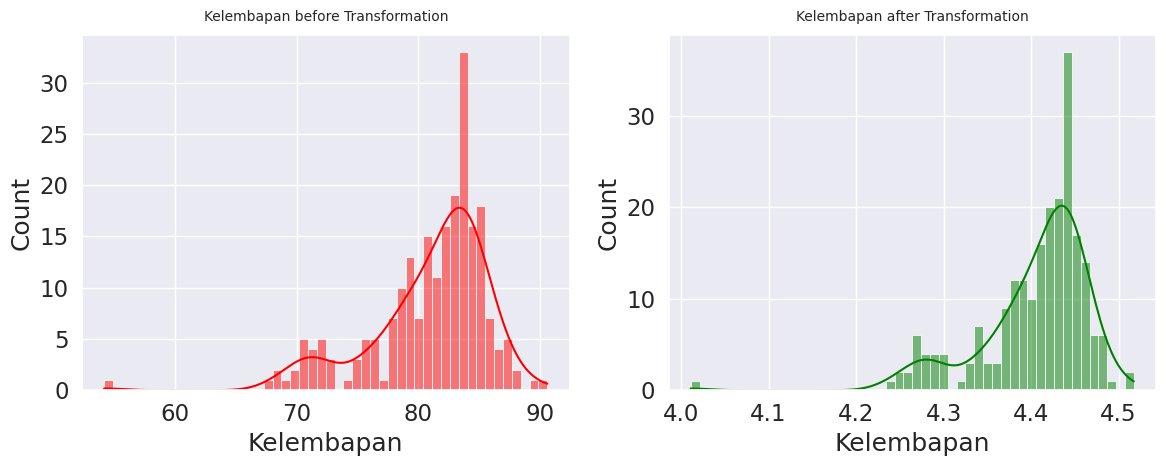

In [ ]:
kelembapan_before = traindata['Kelembapan']
traindata['Kelembapan'] = np.log1p(traindata['Kelembapan'])

plt.figure(figsize = (12,5))
plt.subplot(1,2,2)
sns.histplot(traindata['Kelembapan'], color = 'green', kde = True, bins=50)
plt.title('Kelembapan after Transformation', size = 10, pad = 10)
plt.subplot(1,2,1)
sns.histplot(kelembapan_before, color = 'red', kde = True, bins=50)
plt.title('Kelembapan before Transformation', size = 10, pad = 10)
plt.tight_layout()
plt.show()

<Axes: >

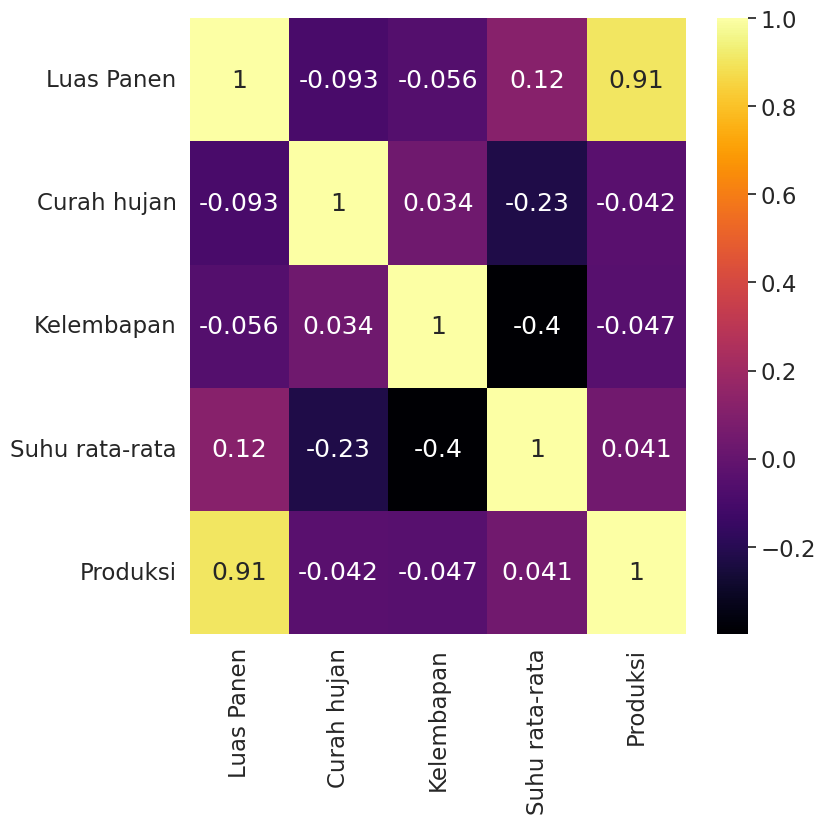

In [ ]:
num_col = ['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']
num_col.append('Produksi')
plt.figure(figsize=(8,8))
sns.heatmap(traindata[num_col].corr(), annot = True, cmap = 'inferno')

**Catatan**
* Tidak ada perubahan korelasi (berkurang sedikit) ataupun bentuk data

### one-hot encoding di data provinsi

In [ ]:
# cols = traindata.select_dtypes(include="object").columns
traindata = pd.get_dummies(traindata, columns=['Provinsi'])
traindata.shape

(224, 13)

### split train test data

In [ ]:
X = traindata.drop(columns = 'Produksi')
y = traindata['Produksi']

##### fitur scaling menggunakan standardscaler

In [ ]:
x_scaled = StandardScaler().fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(179, 12)
(45, 12)
(179,)
(45,)


# Model + Evaluasi

### Build Fungsi Model dan Evalusi

In [ ]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

def model_evaluation(model):
  # training model
  model.fit(x_train,y_train)
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Kalkulasi Metrik
  mae = mean_absolute_error(y_test,y_test_pred)
  mse = mean_squared_error(y_test,y_test_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test,y_test_pred)
  adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

  mae_value.append(mae)
  mse_value.append(mse)
  rmse_value.append(rmse)
  r2_value.append(r2)
  adjusted_r2_value.append(adjusted_r2)

  print(f"R2 Score of the {model} model is=>",r2)
  print(f"Adjusted R2 Score of the {model} model is=>",adjusted_r2)
  print()
  print(f"MAE of {model} model is=>",mae)
  print(f"MSE of {model} model is=>",mse)
  print(f"RMSE of {model} model is=>",rmse)


  # Scatter plot.
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.scatter(y_train, y_train_pred, color='blue', label='Train')
  plt.scatter(y_test, y_test_pred, color='red', label='Test')
  plt.xlabel('True values')
  plt.ylabel('Predicted values')
  plt.legend()
  plt.title('Scatter Plot',fontweight="black",size=20,pad=10)

  # Residual plot.
  plt.subplot(1,2,2)
  plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
  plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
  plt.axhline(y=0, color='black', linestyle='--')
  plt.xlabel('Predicted values')
  plt.ylabel('Residuals')
  plt.legend()
  plt.title('Residual Plot',fontweight="black",size=20,pad=10)
  plt.show()

### LinearRegression

R2 Score of the LinearRegression() model is=> 0.8845288734131868
Adjusted R2 Score of the LinearRegression() model is=> 0.8412272009431319

MAE of LinearRegression() model is=> 263283.21520173806
MSE of LinearRegression() model is=> 134101818340.7371
RMSE of LinearRegression() model is=> 366199.15120155195


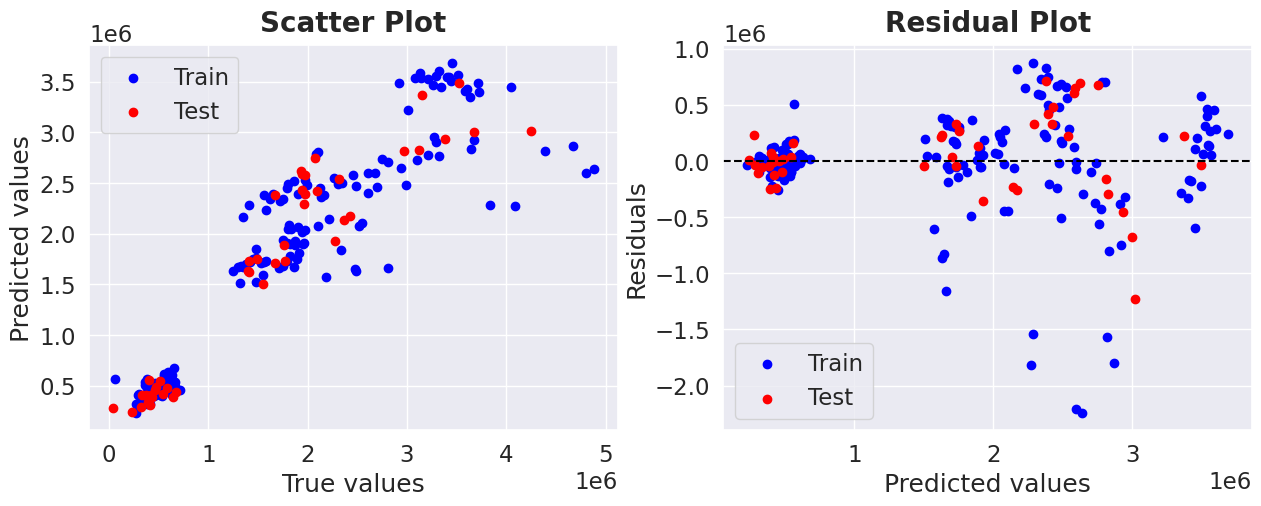

In [ ]:
model_evaluation(LinearRegression())

### Support Vector Regressor (SVR)

R2 Score of the SVR() model is=> -0.01727113376290812
Adjusted R2 Score of the SVR() model is=> -0.39874780892399864

MAE of SVR() model is=> 893859.0419352007
MSE of SVR() model is=> 1181402769813.5234
RMSE of SVR() model is=> 1086923.5344832328


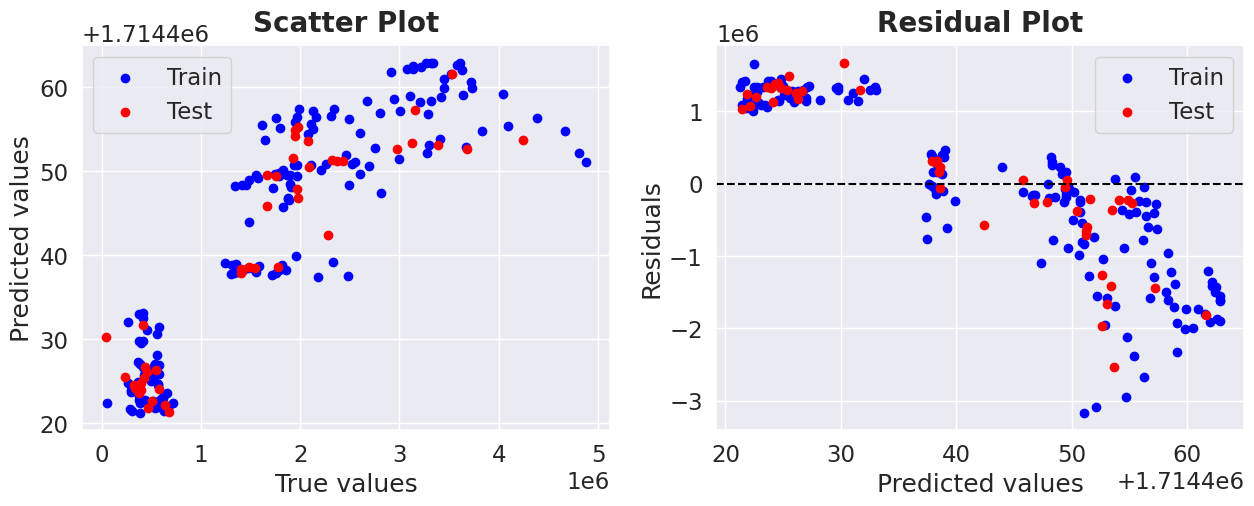

In [ ]:
model_evaluation(SVR())

### RandomForesRegressor

R2 Score of the RandomForestRegressor() model is=> 0.8770225716981289
Adjusted R2 Score of the RandomForestRegressor() model is=> 0.8309060360849272

MAE of RandomForestRegressor() model is=> 212809.01595999996
MSE of RandomForestRegressor() model is=> 142819224490.2879
RMSE of RandomForestRegressor() model is=> 377914.30839581596


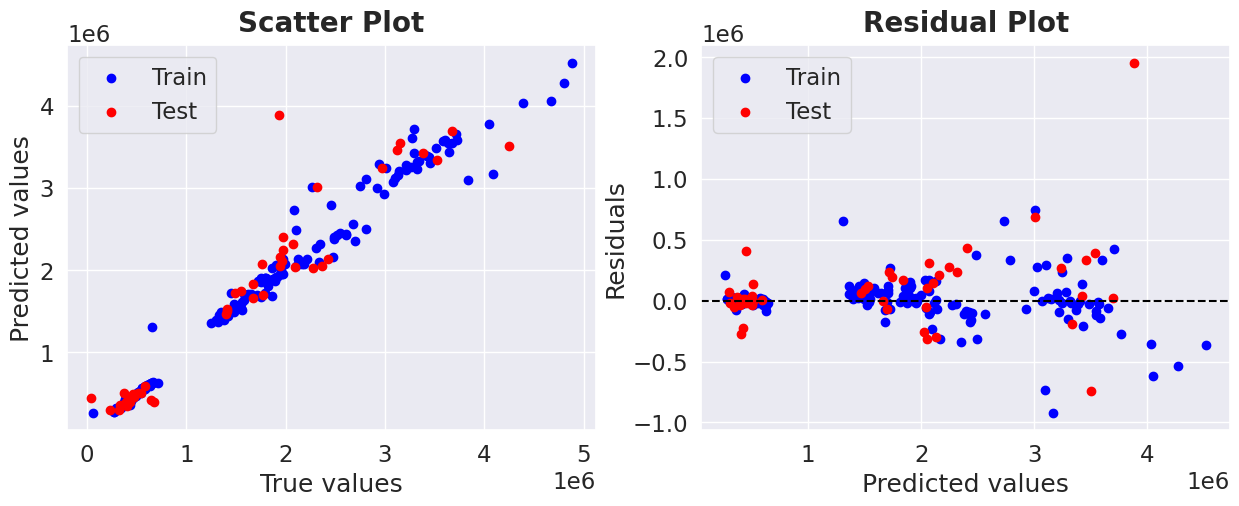

In [ ]:
model_evaluation(RandomForestRegressor())

### AdaBoostRegressor

R2 Score of the AdaBoostRegressor() model is=> 0.8565681413335355
Adjusted R2 Score of the AdaBoostRegressor() model is=> 0.8027811943336114

MAE of AdaBoostRegressor() model is=> 273519.18990586896
MSE of AdaBoostRegressor() model is=> 166573875424.2055
RMSE of AdaBoostRegressor() model is=> 408134.62904316944


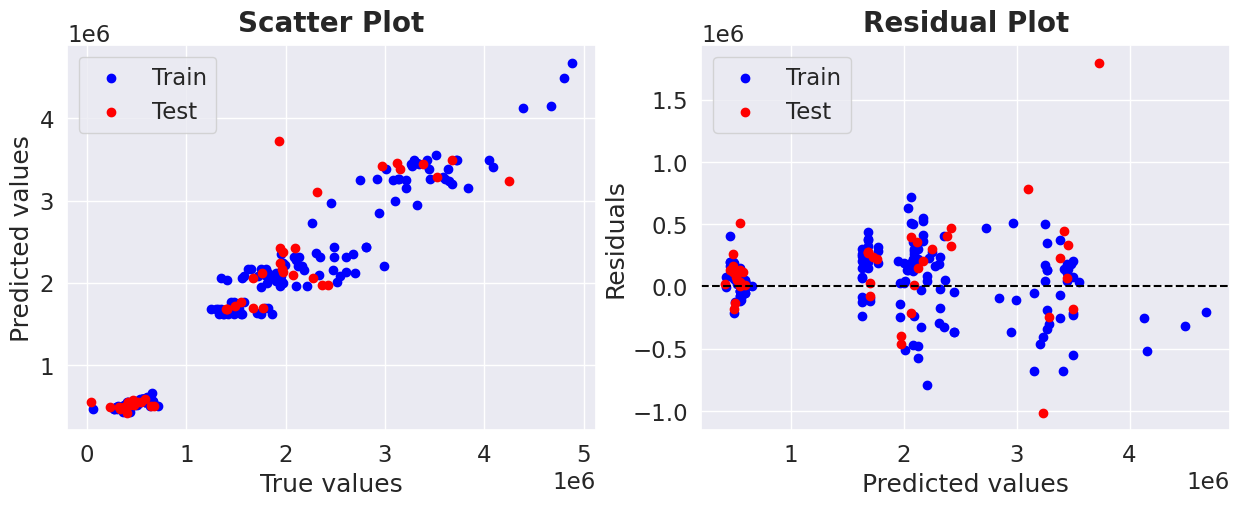

In [ ]:
model_evaluation(AdaBoostRegressor())

### GradientBoostingRegressor

R2 Score of the GradientBoostingRegressor() model is=> 0.8780844530144334
Adjusted R2 Score of the GradientBoostingRegressor() model is=> 0.8323661228948459

MAE of GradientBoostingRegressor() model is=> 193879.81833872653
MSE of GradientBoostingRegressor() model is=> 141586013906.93555
RMSE of GradientBoostingRegressor() model is=> 376279.1701741349


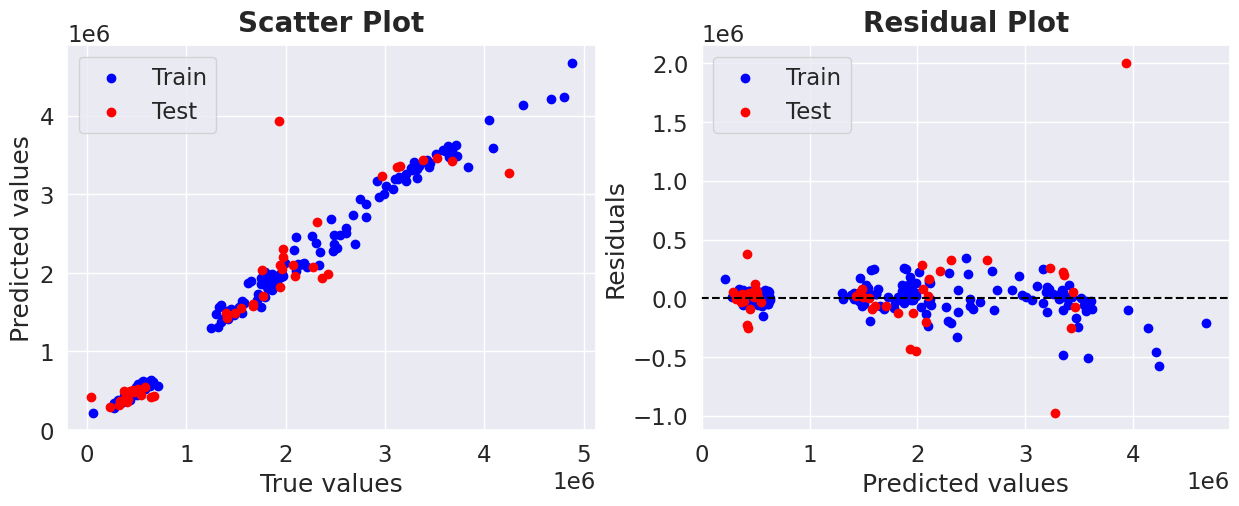

In [ ]:
model_evaluation(GradientBoostingRegressor())

### LGBMRegressor

R2 Score of the LGBMRegressor() model is=> 0.9136932865511908
Adjusted R2 Score of the LGBMRegressor() model is=> 0.8813282690078873

MAE of LGBMRegressor() model is=> 213338.64983634718
MSE of LGBMRegressor() model is=> 100231872249.00603
RMSE of LGBMRegressor() model is=> 316594.175955601


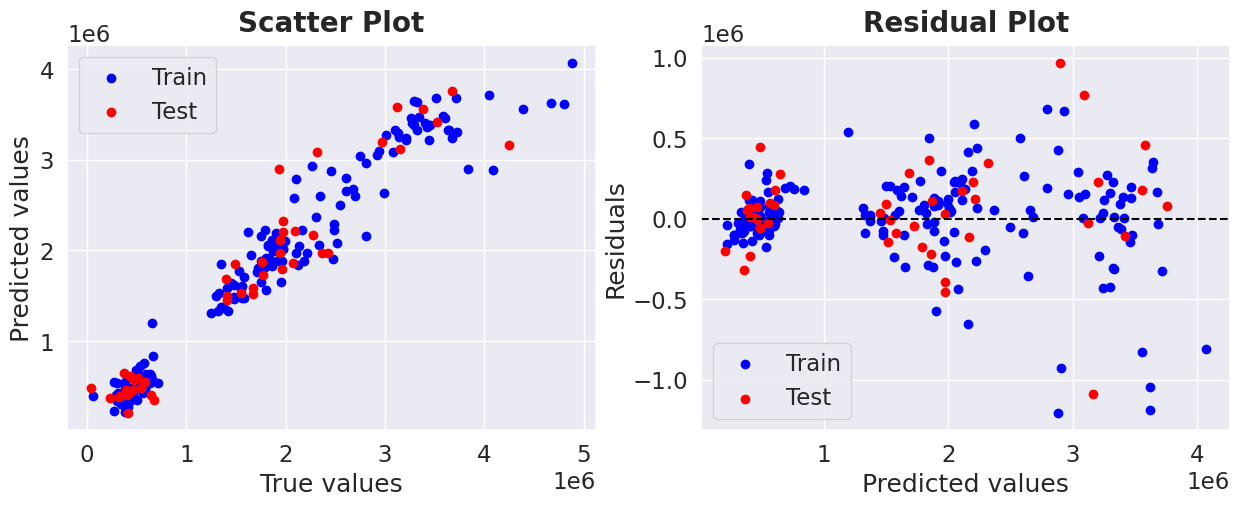

In [ ]:
model_evaluation(LGBMRegressor())

### XGBosstRegressor

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model is=> 0.8823250626147578
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
    

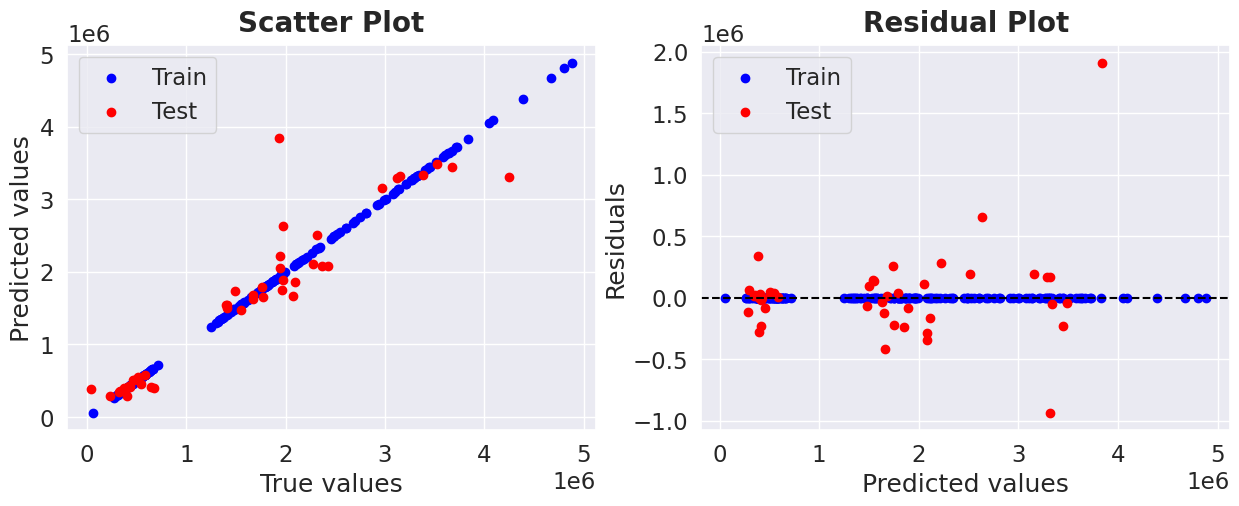

In [ ]:
model_evaluation(XGBRegressor())

### CatBoostRegressor

Learning rate set to 0.031198
0:	learn: 1151313.9520139	total: 50.2ms	remaining: 50.1s
1:	learn: 1128105.4280409	total: 51.5ms	remaining: 25.7s
2:	learn: 1104732.4076931	total: 54ms	remaining: 18s
3:	learn: 1082533.5697217	total: 57ms	remaining: 14.2s
4:	learn: 1061274.6793099	total: 60.5ms	remaining: 12s
5:	learn: 1038447.5177631	total: 62.1ms	remaining: 10.3s
6:	learn: 1022360.2889888	total: 71.3ms	remaining: 10.1s
7:	learn: 1002389.7331161	total: 76.4ms	remaining: 9.47s
8:	learn: 983749.7103106	total: 82.4ms	remaining: 9.07s
9:	learn: 963498.2407957	total: 87.1ms	remaining: 8.62s
10:	learn: 948943.1086647	total: 92.1ms	remaining: 8.28s
11:	learn: 933885.6093021	total: 94.6ms	remaining: 7.79s
12:	learn: 915276.7013660	total: 110ms	remaining: 8.32s
13:	learn: 899743.3592073	total: 110ms	remaining: 7.78s
14:	learn: 887529.5764864	total: 112ms	remaining: 7.33s
15:	learn: 870623.8201212	total: 113ms	remaining: 6.94s
16:	learn: 855684.3093908	total: 114ms	remaining: 6.59s
17:	learn: 84130

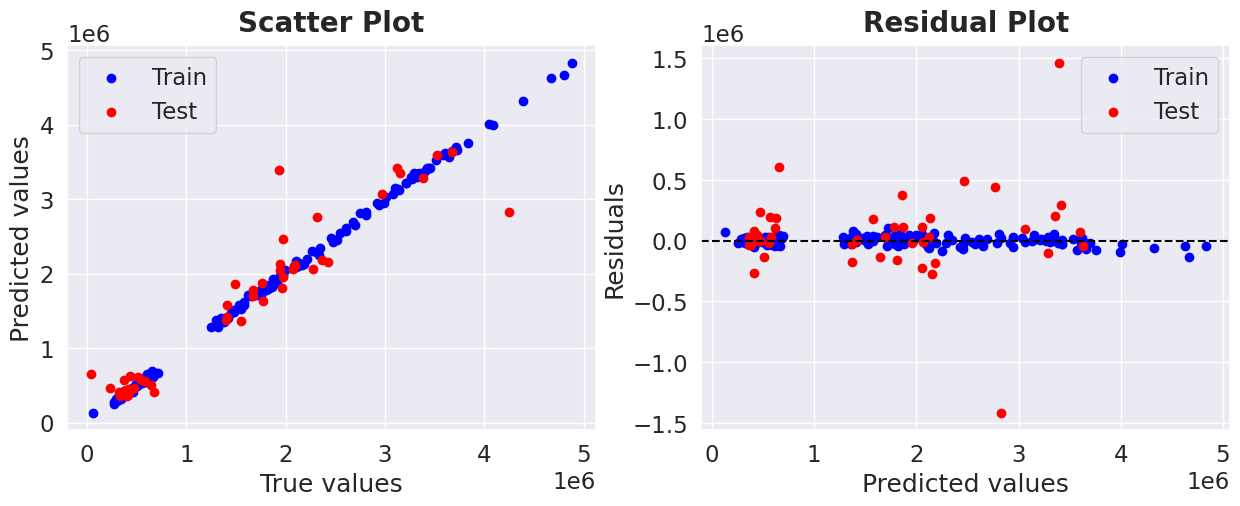

In [ ]:
model_evaluation(CatBoostRegressor())

### Perbandingan Model

In [ ]:
algorithms = ["LinearRegression","SVR","RandomForestRegresor","AdaBoostRegressor","GradientBosstRegressor",
         "LGBMRegressor","XGBosstRegressor","CatBoostRegressor"]

model_comparison = pd.DataFrame({"Model":algorithms,"R2_Score":r2_value,"Adjusted_R2_Score":adjusted_r2_value,
                       "MAE":mae_value,"MSE":mse_value,"RMSE":rmse_value})

model_comparison.sort_values(by='R2_Score', ascending = False)

,Model,R2_Score,Adjusted_R2_Score,MAE,MSE,RMSE
5,LGBMRegressor,0.913693,0.881328,213338.649836,1.002319e+11,3.165942e+05
7,CatBoostRegressor,0.888246,0.846339,200463.431842,1.297847e+11,3.602564e+05
0,LinearRegression,0.884529,0.841227,263283.215202,1.341018e+11,3.661992e+05
6,XGBosstRegressor,0.882325,0.838197,197604.494194,1.366612e+11,3.696772e+05
4,GradientBosstRegressor,0.878084,0.832366,193879.818339,1.415860e+11,3.762792e+05
2,RandomForestRegresor,0.877023,0.830906,212809.015960,1.428192e+11,3.779143e+05
3,AdaBoostRegressor,0.856568,0.802781,273519.189906,1.665739e+11,4.081346e+05
1,SVR,-0.017271,-0.398748,893859.041935,1.181403e+12,1.086924e+06


**Catatan**
* model LGBM menunjukkan performa terbaik diikuti Linear dan XGBoost
* ketiganya akan saya tune dan stacking jadi 1 model
* pertanyaannya kenapa Support Vector menunjukkan performa negatif?

# Hyper-Parameter Tune

### Hyper-Parametr Tuning pada LGBMRegessor

In [ ]:
# import lightgbm as lgb
# lgbm_model = lgb.LGBMRegressor(verbose = False)
# parameters = {'n_estimators': [100, 150, 200],  # Jumlah pohon (iterasi)
#               'learning_rate': [0.01, 0.1, 0.5],  # Tingkat pembelajaran
#               'max_depth': [3, 5, 7]}  # Kedalaman maksimum pohon

# grid_search = GridSearchCV(estimator = lgbm_model, param_grid = parameters , cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(x_train,y_train)

In [ ]:
# best_parameters = grid_search.best_params_
# best_parameters

In [ ]:
# saya selalu mendapatkan error
lgbm_model = LGBMRegressor()
model_evaluation(lgbm_model)

### LinearRegression adalah regresi sederhana jadi tidak memiliki parameter

In [ ]:
linear_model = LinearRegression()
model_evaluation(linear_model)

### Hyper-Parametr Tuning pada XGBRegessor

In [ ]:
XGB_model = XGBRegressor(verbose = False)
parameters3 = {'n_estimators': [100, 200, 300],  # Jumlah pohon (iterasi)
               'learning_rate': [0.01, 0.1, 0.5],  # Tingkat pembelajaran
               'max_depth': [3, 5, 7],  # Kedalaman maksimum pohon
               'subsample': [0.8, 0.9, 1.0],  # Subsample ratio untuk setiap pohon
               'colsample_bytree': [0.8, 0.9, 1.0]}  # Subsample ratio untuk setiap kolom (fitur) pada setiap pohon

grid_search3 = GridSearchCV(estimator = XGB_model, param_grid = parameters3 , cv=5, scoring='neg_mean_squared_error')
grid_search3.fit(x_train,y_train)

In [ ]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'colsample_bytree': 0.8,
 'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 1.0}

[17:19:38] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model is=> 0.8776216110417868
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_b

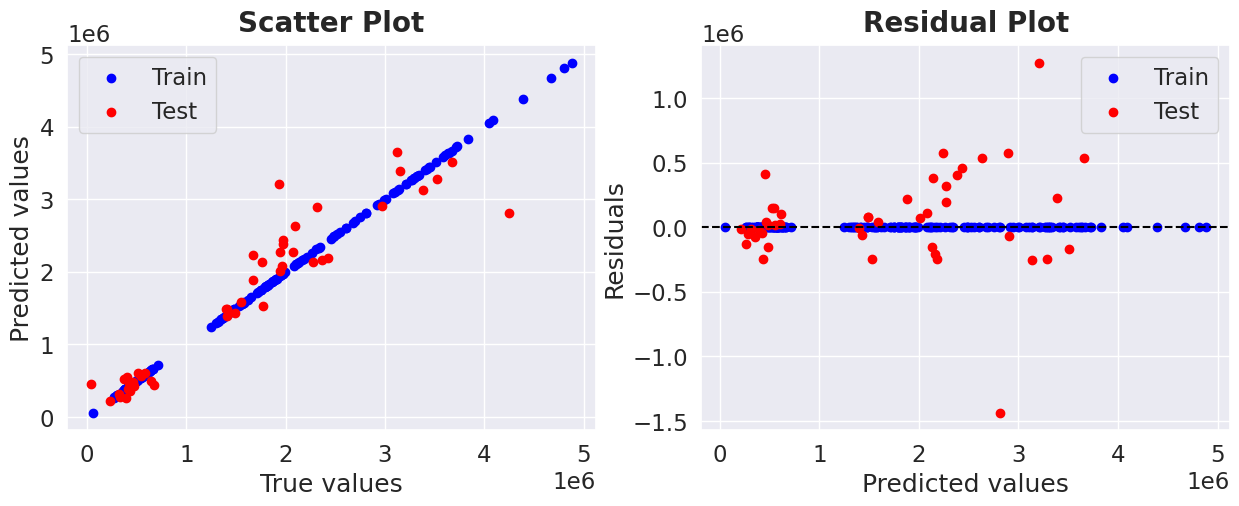

In [ ]:
XGB_model = XGBRegressor(**best_parameters3, verbose = False)
model_evaluation(XGB_model)

# Stacking Model

[17:19:46] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[17:19:46] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[17:19:46] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[17:19:46] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[17:19:47] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[17:19:47] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

R2 Score of the StackingCVRegressor(meta_regressor=LGBMRegressor(),
                    regressors=(LGBMRegressor(), LinearRegression(),
                                XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=0.8,
            

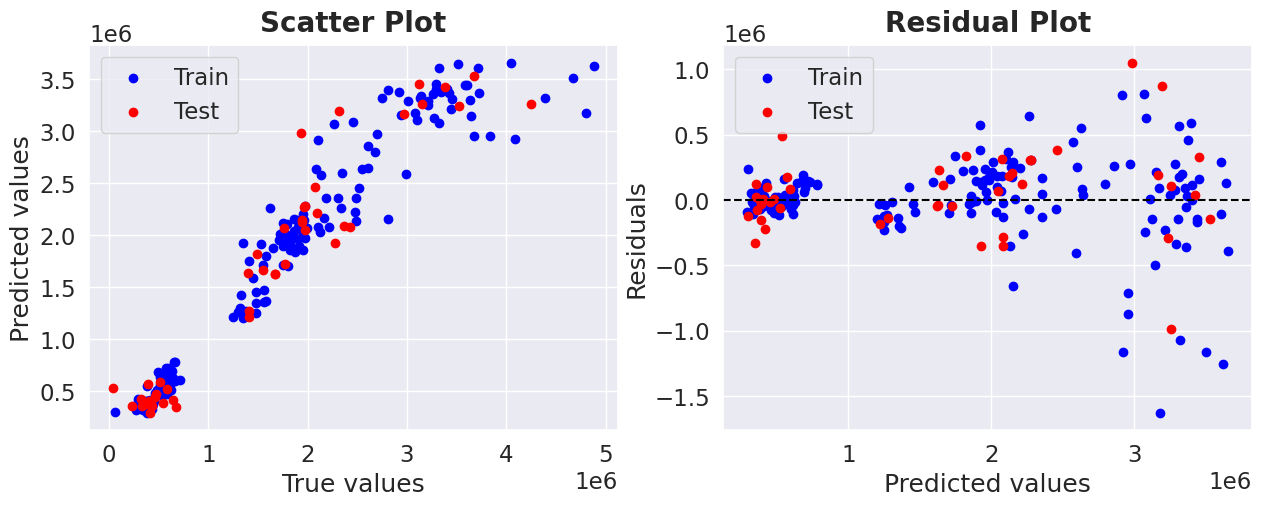

In [ ]:
stack_model = StackingCVRegressor(regressors=(lgbm_model,linear_model,XGB_model),
                                  meta_regressor = lgbm_model,
                                  use_features_in_secondary=True)
# stack_model.fit(x_train, y_train)
model_evaluation(stack_model)

**Catatan**
* R2_score yang dihasilkan adalah 90 %

# Save Model

In [ ]:
import joblib

# Simpan model ke dalam file dengan ekstensi .pkl
joblib.dump(stack_model, 'Regresi_produksi_padi_Sumatra.pkl')

['Regresi_produksi_padi_Sumatra.pkl']